In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Objective

Explore formation of clusters in self attention mechanism

Let data = Q(x) = K(x) 

In [16]:
data = np.random.random([10, 3])
data

array([[0.61107478, 0.15715238, 0.25787276],
       [0.12922381, 0.76664499, 0.72477549],
       [0.20410621, 0.46810084, 0.84943943],
       [0.74108794, 0.04128626, 0.10029511],
       [0.27296127, 0.26987117, 0.61806133],
       [0.21421569, 0.73932563, 0.26637561],
       [0.40543376, 0.3795455 , 0.91168854],
       [0.27358626, 0.33749604, 0.18537764],
       [0.25458585, 0.46878745, 0.06316687],
       [0.02398613, 0.48648354, 0.19256371]])

In [17]:
centroids = np.zeros([3, 3])
centroids[0][0] = 0
centroids[0][2] = 1
centroids[2][0] = 2
centroids

array([[0., 0., 1.],
       [0., 0., 0.],
       [2., 0., 0.]])

In [18]:
kmeans = KMeans(n_clusters = 3, init=centroids, n_init=1, max_iter=5)

In [65]:
kmeans.fit(data)

KMeans(init=array([[0., 0., 1.],
       [0., 0., 0.],
       [2., 0., 0.]]),
       max_iter=5, n_clusters=3, n_init=1)

In [66]:
labels = kmeans.labels_
labels

array([2, 0, 2, 0, 1, 1, 0, 0, 0, 0], dtype=int32)

In [6]:
def plot_3d(vectors, labels):    
    # Creating a figure and 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extracting X, Y, Z components of vectors
    X = vectors[:, 0]
    Y = vectors[:, 1]
    Z = vectors[:, 2]

    # Define a colormap (or use specific colors based on labels)
    colors = ['r', 'g', 'b']  # Replace with colors based on labels, or generate from colormap
    vector_colors = [colors[label] for label in labels]

    # Plot each vector with a different color
    for i in range(len(X)):
        ax.quiver(0, 0, 0, X[i], Y[i], Z[i], color=vector_colors[i])


    # Set labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    # Show plot
    plt.show()

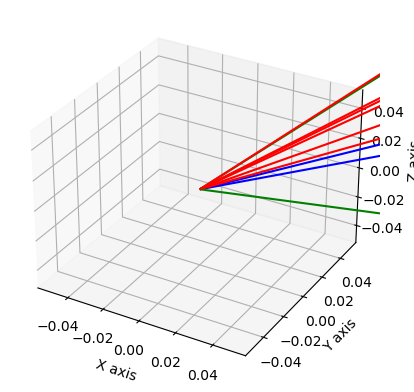

In [68]:
plot_3d(data, labels)

In [7]:
def softmax(v):
    z = np.exp(v - np.max(v, axis=-1, keepdims=True))
    z = z / np.sum(z, axis=-1, keepdims=True)
    return z

def simplified_attn(q, k):
    attn_scores = np.dot(q, k.T)
    attn_norm = softmax(attn_scores)
    d = q.shape[-1]
    A = attn_norm / d
    w, v = np.linalg.eig(A)

    return np.dot(A, q)

In [8]:
lam = 2
embed_dim = data.shape[1]
W = lam * np.eye(embed_dim)

### Without residual

collapse into single vector due to softmax

[1 0 0 1 2 1 2 1 1 1]


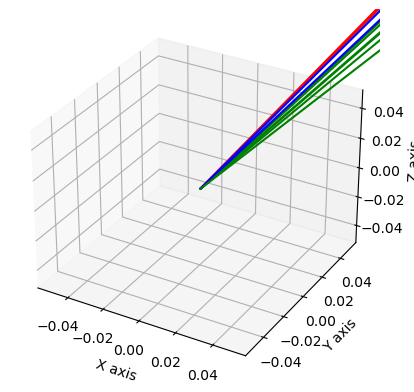

[1 0 0 1 2 2 0 1 1 2]


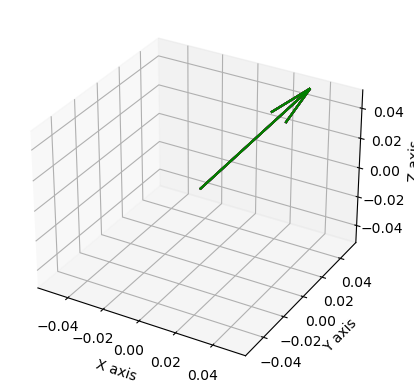

[1 1 1 0 2 1 1 1 2 2]


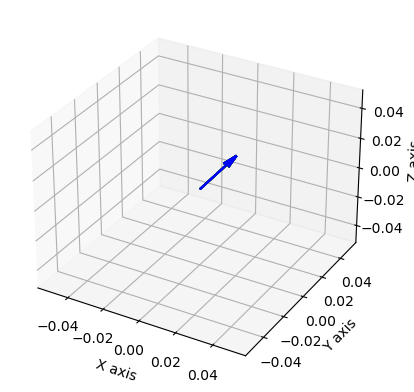

In [30]:
num_iter = 3 
tmp_data = data
for i in range(num_iter):
    pre_attn = tmp_data
    tmp_data = simplified_attn(tmp_data, tmp_data)
    kmeans.fit(tmp_data)
    labels = kmeans.labels_
    print(labels)
    plot_3d(tmp_data, labels)

### With residual

[1 0 0 1 0 2 0 2 2 2]


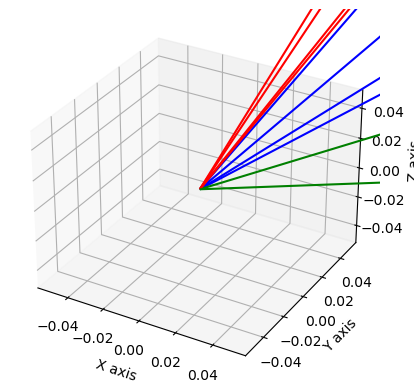

[2 0 0 2 0 1 0 1 1 1]


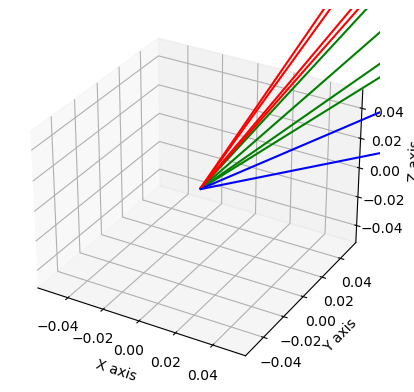

[2 1 1 2 1 0 1 0 0 0]


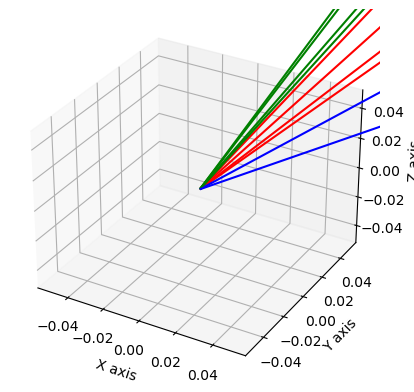

In [29]:
num_iter = 3 
tmp_data = data
for i in range(num_iter):
    pre_attn = tmp_data
    tmp_data = simplified_attn(tmp_data, tmp_data)
    # tmp_data = np.dot(tmp_data, W)
    tmp_data += pre_attn # residual
    kmeans.fit(tmp_data)
    labels = kmeans.labels_
    print(labels)
    plot_3d(tmp_data, labels)

In [23]:
def cosine_similarity_matrix(vectors):
    # returns matrix where each entry [i, j] is the cosine similarity between vector i and vector j
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    normalized_vectors = vectors / (norms + 1e-10)
    
    # Compute the cosine similarity matrix (dot product of normalized vectors)
    cosine_similarity = np.dot(normalized_vectors, normalized_vectors.T)
    
    return cosine_similarity

In [22]:
def filter_by_class(vectors, labels):
    class_average_sim = []
    for label in range(3):
        # group
        grouped_vectors = vectors[labels == label]
        # compute avg cos sim for al them
        class_avg = cosine_similarity_matrix(grouped_vectors).mean()
        # print(f"Label {label} similarity: {class_avg}")
        class_average_sim.append(class_avg)
    return class_average_sim

def unravel_filter_by_classes(full_list):
    class_a = []
    class_b = []
    class_c = []
    for a,b,c in full_list:
        class_a.append(a)
        class_b.append(b)
        class_c.append(c)
    return class_a, class_b, class_c


### Comparison of cos similarity without/with residual

Blue is all vectors

other colors are class specific similarity

Class = what label is received

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9


/Users/tristanpeat/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/var/folders/2_/v6gp9f6j51j6mbdq2r1fnzb40000gn/T/ipykernel_75128/1245889169.py:7: RuntimeWarning: Mean of empty slice.
  class_avg = cosine_similarity_matrix(grouped_vectors).mean()
/Users/tristanpeat/miniforge3/envs/torch/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tristanpeat/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/var/folders/2_/v6gp9f6j51j6mbdq2r1fnzb40000gn/T/ipykernel_75128/1245889169.py:7: RuntimeWarnin

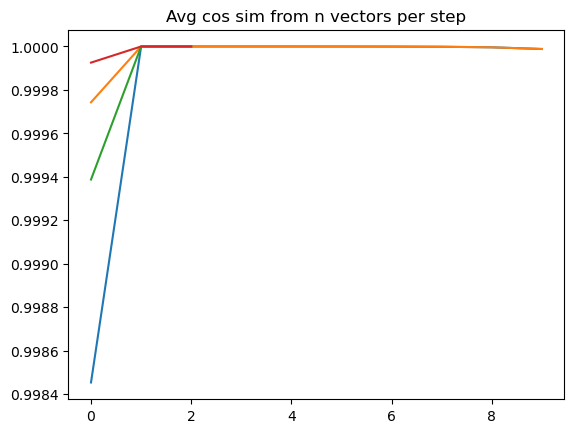

In [31]:
n_vectors = 10
embed_d = 3
data_tmp = np.random.random([n_vectors, embed_d])

avg_sim_list = []
filter_by_class_list = []
for i in range(10):
    print(f"Step {i}")
    pre_attn = data_tmp
    data_tmp = simplified_attn(data_tmp, data_tmp)
    avg_sim = cosine_similarity_matrix(data_tmp).mean()
    kmeans.fit(data_tmp)
    labels = kmeans.labels_
    class_avg = filter_by_class(data_tmp, labels)
    avg_sim_list.append(avg_sim)
    filter_by_class_list.append(class_avg)

class_a, class_b, class_c = unravel_filter_by_classes(filter_by_class_list)
plt.plot(avg_sim_list)
plt.plot(class_a)
plt.plot(class_b)
plt.plot(class_c)
plt.title("Avg cos sim from n vectors per step")
plt.show()

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9


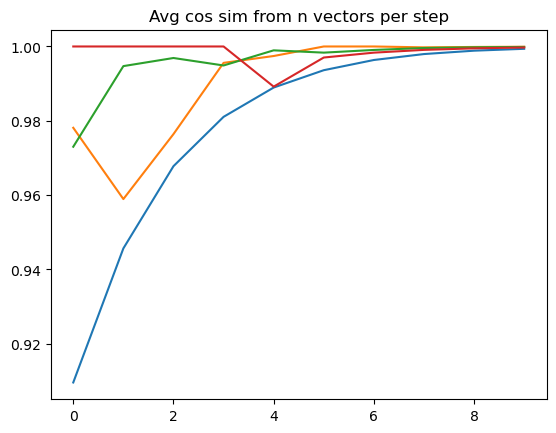

In [26]:
n_vectors = 10
embed_d = 3
data_tmp = np.random.random([n_vectors, embed_d])

avg_sim_list = []
filter_by_class_list = []
for i in range(10):
    print(f"Step {i}")
    pre_attn = data_tmp
    data_tmp = simplified_attn(data_tmp, data_tmp)
    data_tmp += pre_attn
    avg_sim = cosine_similarity_matrix(data_tmp).mean()
    kmeans.fit(data_tmp)
    labels = kmeans.labels_
    class_avg = filter_by_class(data_tmp, labels)
    avg_sim_list.append(avg_sim)
    filter_by_class_list.append(class_avg)

class_a, class_b, class_c = unravel_filter_by_classes(filter_by_class_list)
plt.plot(avg_sim_list)
plt.plot(class_a)
plt.plot(class_b)
plt.plot(class_c)
plt.title("Avg cos sim from n vectors per step")
plt.show()